### Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


### Configuration

In [25]:
EXPERIMENT = "tara"
MODE = "train"
ACTIVITIES = ["relaxing", "eating", "walking", "studying"]

### Dataset

In [26]:
dataset: pd.DataFrame = pd.read_csv(f"state/{EXPERIMENT}_{MODE}_interpolated.csv")
dataset

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,bar_relativeAltitude,bar_pressure,gps_altitude,gps_latitude,gps_longitude,time,relaxing,eating,walking,studying
0,-0.170119,0.161832,0.227087,-0.106231,0.010597,-0.084743,-7.913668,-5.737212,0.255096,-0.680946,...,10.652779,1017.477798,41.531347,52.045377,4.384529,2023-06-08 10:02:22.428471800,1,0,0,0
1,-0.013682,0.035644,-0.121006,0.063131,-0.017078,0.058775,-8.082583,-5.502527,-0.606385,-0.702423,...,10.404400,1017.475510,41.680638,52.045386,4.384549,2023-06-08 10:02:23.428471800,1,0,0,0
2,-0.010919,0.023102,0.010215,-0.020131,0.028427,-0.066613,-8.030929,-5.606764,-0.185498,-0.683085,...,2.424594,1017.473145,41.680506,52.045390,4.384558,2023-06-08 10:02:24.428471800,1,0,0,0
3,-0.001532,0.016153,-0.022530,-0.040057,0.022515,0.068452,-8.263604,-5.239394,-0.517118,-0.702382,...,6.945074,1017.472839,41.747784,52.045390,4.384556,2023-06-08 10:02:25.428471800,1,0,0,0
4,-0.031619,0.024387,0.006676,-0.016860,-0.112503,0.110842,-7.518719,-6.229657,-0.477621,-0.695890,...,10.404400,1017.472839,41.723107,52.045389,4.384561,2023-06-08 10:02:26.428471800,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.021761,0.002616,0.002799,0.000822,-0.002059,0.015809,0.609068,-9.656272,-1.598371,0.001219,...,20.419849,1015.060806,41.477542,52.045441,4.384580,2023-06-08 16:02:13.428471800,1,0,0,0
21592,0.014316,0.002327,-0.003718,0.014287,0.011617,0.026606,0.848866,-9.622351,-1.686895,-0.002057,...,20.430418,1015.059662,41.477542,52.045441,4.384580,2023-06-08 16:02:14.428471800,1,0,0,0
21593,0.009734,0.003723,-0.005396,-0.012023,-0.035512,0.037696,1.123775,-9.595271,-1.669564,0.000391,...,19.044785,1015.315704,41.486357,52.045444,4.384573,2023-06-08 16:02:15.428471800,1,0,0,0
21594,-0.001886,0.009764,0.005781,-0.012753,-0.005079,-0.044107,1.032805,-9.629271,-1.538645,0.010899,...,18.878848,1015.333954,41.486357,52.045444,4.384573,2023-06-08 16:02:16.428471800,1,0,0,0


## PCA

In [27]:
from book.Chapter3.DataTransformation import PrincipalComponentAnalysis

pca = PrincipalComponentAnalysis().apply_pca(dataset, dataset.columns[:-5],len(dataset.columns[:-5]))
dataset = pca


## Feature engineering part 1: rolling mean/median/std/max/min/slope

In [28]:
window_sizes = [5, 10, 15, 20, 25, 30]

columns_to_featurize = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'gravity_z', 'gravity_y', 'gravity_x',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw',
    'magne_z', 'magne_y', 'magne_x',
    'bar_relativeAltitude', 'bar_pressure',
    'gps_altitude', 'gps_latitude', 'gps_longitude'
]

# Exclude time and label columns
for column in dataset[columns_to_featurize]:
    for window_size in window_sizes:
        rolling_mean = dataset[column].rolling(window_size).mean()
        rolling_median = dataset[column].rolling(window_size).median()
        rolling_std = dataset[column].rolling(window_size).std()
        rolling_max = dataset[column].rolling(window_size).max()
        rolling_min = dataset[column].rolling(window_size).min()

        new_column_mean_name = f"{column}_rolling_mean_{window_size}"
        new_column_median_name = f"{column}_rolling_median_{window_size}"
        new_column_std_name = f"{column}_rolling_std_{window_size}"
        new_column_max_name = f"{column}_rolling_max_{window_size}"
        new_column_min_name = f"{column}_rolling_min_{window_size}"

        dataset[new_column_mean_name] = rolling_mean
        dataset[new_column_median_name] = rolling_median
        dataset[new_column_std_name] = rolling_std
        dataset[new_column_max_name] = rolling_max
        dataset[new_column_min_name] = rolling_min

dataset

/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/3131833217.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_std_name] = rolling_std
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/3131833217.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_max_name] = rolling_max
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/3131833217.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,gps_longitude_rolling_mean_25,gps_longitude_rolling_median_25,gps_longitude_rolling_std_25,gps_longitude_rolling_max_25,gps_longitude_rolling_min_25,gps_longitude_rolling_mean_30,gps_longitude_rolling_median_30,gps_longitude_rolling_std_30,gps_longitude_rolling_max_30,gps_longitude_rolling_min_30
0,-0.170119,0.161832,0.227087,-0.106231,0.010597,-0.084743,-7.913668,-5.737212,0.255096,-0.680946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.013682,0.035644,-0.121006,0.063131,-0.017078,0.058775,-8.082583,-5.502527,-0.606385,-0.702423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.010919,0.023102,0.010215,-0.020131,0.028427,-0.066613,-8.030929,-5.606764,-0.185498,-0.683085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.001532,0.016153,-0.022530,-0.040057,0.022515,0.068452,-8.263604,-5.239394,-0.517118,-0.702382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.031619,0.024387,0.006676,-0.016860,-0.112503,0.110842,-7.518719,-6.229657,-0.477621,-0.695890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.021761,0.002616,0.002799,0.000822,-0.002059,0.015809,0.609068,-9.656272,-1.598371,0.001219,...,4.384574,4.384574,0.000004,4.38458,4.384569,4.384575,4.384574,0.000004,4.38458,4.384569
21592,0.014316,0.002327,-0.003718,0.014287,0.011617,0.026606,0.848866,-9.622351,-1.686895,-0.002057,...,4.384574,4.384574,0.000004,4.38458,4.384569,4.384575,4.384574,0.000004,4.38458,4.384569
21593,0.009734,0.003723,-0.005396,-0.012023,-0.035512,0.037696,1.123775,-9.595271,-1.669564,0.000391,...,4.384574,4.384573,0.000004,4.38458,4.384569,4.384575,4.384574,0.000004,4.38458,4.384569
21594,-0.001886,0.009764,0.005781,-0.012753,-0.005079,-0.044107,1.032805,-9.629271,-1.538645,0.010899,...,4.384574,4.384573,0.000004,4.38458,4.384569,4.384574,4.384574,0.000004,4.38458,4.384569


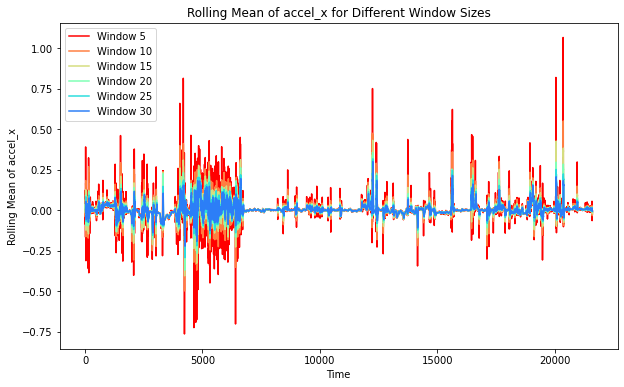

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you have a DataFrame 'dataset' with columns for rolling mean values
# for different window sizes of 'accel_x'

# Selecting the relevant columns for plotting
window_sizes = [5, 10, 15, 20, 25, 30]
rolling_mean_cols = ['accel_x_rolling_mean_5', 'accel_x_rolling_mean_10', 'accel_x_rolling_mean_15',
                     'accel_x_rolling_mean_20', 'accel_x_rolling_mean_25', 'accel_x_rolling_mean_30']

# Plotting the line plot with rainbow colors
plt.figure(figsize=(10, 6))
colors = cm.rainbow_r([i / len(rolling_mean_cols) for i in range(len(rolling_mean_cols))])
for col, color in zip(rolling_mean_cols, colors):
    plt.plot(dataset.index, dataset[col], color=color, label=f'Window {col.split("_")[-1]}')

plt.xlabel('Time')
plt.ylabel('Rolling Mean of accel_x')
plt.title('Rolling Mean of accel_x for Different Window Sizes')
plt.legend()
plt.show()


## Fourier

In [30]:
import numpy as np

window_sizes = [5, 10, 15, 20, 25, 30]
num_fourier_features = 5

columns_to_featurize = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'gravity_z', 'gravity_y', 'gravity_x',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw',
    'magne_z', 'magne_y', 'magne_x'
]

# Exclude time and label columns
for column in dataset[columns_to_featurize]:
    for window_size in window_sizes:
        rolling_mean = dataset[column].rolling(window_size).mean().fillna(0)
        new_column_mean_name = f"{column}_rolling_mean_{window_size}"
        dataset[new_column_mean_name] = rolling_mean
        
        data = rolling_mean.values
        
        # Compute FFT
        fft_result = np.fft.fft(data)
        
        # Mean Power Spectrum
        power_spectrum = np.abs(fft_result) ** 2
        new_column_power_name = f"{column}_power_window_{window_size}"
        dataset[new_column_power_name] = power_spectrum.mean()
        
        # Mean Amplitude Spectrum
        amplitude_spectrum = np.abs(fft_result)
        new_column_amplitude_name = f"{column}_amplitude_window_{window_size}"
        dataset[new_column_amplitude_name] = amplitude_spectrum.mean()
        
        # Total Power or Energy
        total_power = np.sum(power_spectrum)
        new_column_energy_name = f"{column}_total_power_{window_size}"
        dataset[new_column_energy_name] = total_power
        
        # Mean Frequency
        frequencies = np.fft.fftfreq(len(data))
        mean_frequency = np.sum(power_spectrum * frequencies) / total_power
        new_column_mean_freq_name = f"{column}_mean_frequency_{window_size}"
        dataset[new_column_mean_freq_name] = mean_frequency
dataset

/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/4033790892.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_amplitude_name] = amplitude_spectrum.mean()
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/4033790892.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[new_column_energy_name] = total_power
/var/folders/_6/3cydh_512s94j8m3t47xggm00000gn/T/ipykernel_56823/4033790892.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,magne_x_total_power_20,magne_x_mean_frequency_20,magne_x_power_window_25,magne_x_amplitude_window_25,magne_x_total_power_25,magne_x_mean_frequency_25,magne_x_power_window_30,magne_x_amplitude_window_30,magne_x_total_power_30,magne_x_mean_frequency_30
0,-0.170119,0.161832,0.227087,-0.106231,0.010597,-0.084743,-7.913668,-5.737212,0.255096,-0.680946,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
1,-0.013682,0.035644,-0.121006,0.063131,-0.017078,0.058775,-8.082583,-5.502527,-0.606385,-0.702423,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
2,-0.010919,0.023102,0.010215,-0.020131,0.028427,-0.066613,-8.030929,-5.606764,-0.185498,-0.683085,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
3,-0.001532,0.016153,-0.022530,-0.040057,0.022515,0.068452,-8.263604,-5.239394,-0.517118,-0.702382,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
4,-0.031619,0.024387,0.006676,-0.016860,-0.112503,0.110842,-7.518719,-6.229657,-0.477621,-0.695890,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.021761,0.002616,0.002799,0.000822,-0.002059,0.015809,0.609068,-9.656272,-1.598371,0.001219,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
21592,0.014316,0.002327,-0.003718,0.014287,0.011617,0.026606,0.848866,-9.622351,-1.686895,-0.002057,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
21593,0.009734,0.003723,-0.005396,-0.012023,-0.035512,0.037696,1.123775,-9.595271,-1.669564,0.000391,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11
21594,-0.001886,0.009764,0.005781,-0.012753,-0.005079,-0.044107,1.032805,-9.629271,-1.538645,0.010899,...,2.311517e+11,-6.007765e-11,1.060346e+07,398.583594,2.289924e+11,-9.394366e-11,1.051316e+07,378.123879,2.270421e+11,-9.709069e-11


In [31]:
len(dataset.columns)

1061

## Create validation set

<AxesSubplot:xlabel='time'>

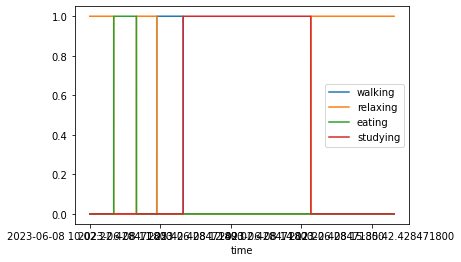

In [32]:
dataset.plot(x='time',y= ['walking', 'relaxing', 'eating', 'studying'])

In [33]:
categories = ['relaxing', 'studying','walking', 'eating']

validation_set = pd.DataFrame(columns=dataset.columns)

for category in categories:
    category_data = dataset[dataset[category] == 1].copy()
    validation_instances = category_data.tail(300)
    validation_set = pd.concat([validation_instances, validation_set], ignore_index=True)
    dataset = dataset.drop(validation_instances.index)

    

<AxesSubplot:xlabel='time'>

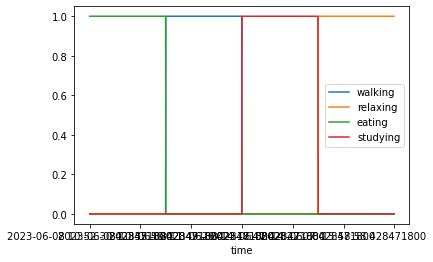

In [34]:
validation_set.plot(x='time',y= ['walking', 'relaxing', 'eating', 'studying'])

## Forward Select

In [39]:
y_train = dataset[['walking', 'relaxing', 'eating', 'studying']]
X_train = dataset.drop(columns=['walking', 'relaxing', 'eating', 'studying'])

y_val = validation_set[['walking', 'relaxing', 'eating', 'studying']]
X_val = validation_set.drop(columns=['walking', 'relaxing', 'eating', 'studying'])


In [35]:
from book.Chapter7.FeatureSelection import FeatureSelectionClassification

fw_select = FeatureSelectionClassification().forward_selection(100, X_train, X_test, y_val, y_val)

## Saving experiment state

In [185]:
from pathlib import Path

# saving the state for faster further experimentation
target_directory = "final_datasets"
Path(target_directory).mkdir(exist_ok=True, parents=True)
dataset.to_csv(f"{target_directory}/{EXPERIMENT}_{MODE}_features.csv", index=False)